# 1.0 Upload files

In [6]:
# Uploading files from your local file system
# AmesHousing.txt

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AmesHousing.txt to AmesHousing.txt
User uploaded file "AmesHousing.txt" with length 963738 bytes


# 2.0 The Linear Regression Model



## 2.1 Introduction to the data


To get familiar with this machine learning approach, we'll work with a dataset on sold houses in Ames, Iowa. Each row in the dataset describes the properties of a single house as well as the amount it was sold for. In this course, we'll build models that predict the final sale price from its other attributes. Specifically, we'll explore the following questions:

- Which properties of a house most affect the final sale price?
- How effectively can we predict the sale price from just its properties?

This dataset was originally compiled by [Dean De Cock](http://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression. You can read more about his process and motivation [here](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf) and download the dataset [here](https://ww2.amstat.org/publications/jse/v19n3/decock/AmesHousing.txt).

Here are some of the columns:

- **Lot Area**: Lot size in square feet.
- **Overall Qual**: Rates the overall material and finish of the house.
- **Overall Cond**: Rates the overall condition of the house.
- **Year Built**: Original construction date.
- **Low Qual Fin SF**: Low quality finished square feet (all floors).
- **Full Bath**: Full bathrooms above grade.
- **Fireplaces**: Number of fireplaces.

Let's start by generating train and test datasets and getting more familiar with the data.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Read **AmesHousing.txt** into a dataframe using the tab delimiter (**\t**) and assign to **data**.
- Select the first **1460** rows from **data** and assign to **train**.
- Select the remaining rows from **data** and assign to **test**.
- Use the **dataframe.info()** method to display information about each column.
- Read the [data documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt) to get more familiar with each column.
- Using the data documentation, determine which column is the target column we want to predict. Assign the column name as a string to **target**.

In [2]:
# put your code here
# Traditional approach using pandas and head() for the first visualization
import pandas as pd

data = pd.read_csv("AmesHousing.txt", sep='\t')
print(data.shape)
data.head()



(2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
data.columns

Index([u'Order', u'PID', u'MS SubClass', u'MS Zoning', u'Lot Frontage',
       u'Lot Area', u'Street', u'Alley', u'Lot Shape', u'Land Contour',
       u'Utilities', u'Lot Config', u'Land Slope', u'Neighborhood',
       u'Condition 1', u'Condition 2', u'Bldg Type', u'House Style',
       u'Overall Qual', u'Overall Cond', u'Year Built', u'Year Remod/Add',
       u'Roof Style', u'Roof Matl', u'Exterior 1st', u'Exterior 2nd',
       u'Mas Vnr Type', u'Mas Vnr Area', u'Exter Qual', u'Exter Cond',
       u'Foundation', u'Bsmt Qual', u'Bsmt Cond', u'Bsmt Exposure',
       u'BsmtFin Type 1', u'BsmtFin SF 1', u'BsmtFin Type 2', u'BsmtFin SF 2',
       u'Bsmt Unf SF', u'Total Bsmt SF', u'Heating', u'Heating QC',
       u'Central Air', u'Electrical', u'1st Flr SF', u'2nd Flr SF',
       u'Low Qual Fin SF', u'Gr Liv Area', u'Bsmt Full Bath',
       u'Bsmt Half Bath', u'Full Bath', u'Half Bath', u'Bedroom AbvGr',
       u'Kitchen AbvGr', u'Kitchen Qual', u'TotRms AbvGrd', u'Functional',
       u'Fi

In [4]:
#split data in train data and test data

from sklearn.model_selection import train_test_split

columns = ['Lot Area','Gr Liv Area','Garage Area','Overall Cond','Year Built', 'Yr Sold', 'SalePrice']

train, test = train_test_split(data,
                               test_size=0.5017,
                               random_state=42)

print("data has {} instances\n {} train instances\n {} test intances".
      format(data.shape[0],train.shape[0],test.shape[0]))

data has 2930 instances
 1460 train instances
 1470 test intances


In [5]:
train[columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 271 to 860
Data columns (total 7 columns):
Lot Area        1460 non-null int64
Gr Liv Area     1460 non-null int64
Garage Area     1459 non-null float64
Overall Cond    1460 non-null int64
Year Built      1460 non-null int64
Yr Sold         1460 non-null int64
SalePrice       1460 non-null int64
dtypes: float64(1), int64(6)
memory usage: 91.2 KB


In [6]:
train[columns].describe()

,Lot Area,Gr Liv Area,Garage Area,Overall Cond,Year Built,Yr Sold,SalePrice
count,1460.000000,1460.000000,1459.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10207.636986,1497.934932,472.272104,5.584247,1970.459589,2007.765753,179594.469863
std,8630.283217,503.820440,215.858262,1.121977,30.436448,1.314726,78015.206966
min,1300.000000,334.000000,0.000000,1.000000,1872.000000,2006.000000,12789.000000
25%,7424.750000,1126.000000,319.000000,5.000000,1953.000000,2007.000000,129900.000000
50%,9350.000000,1438.500000,480.000000,5.000000,1972.000000,2008.000000,160375.000000
75%,11532.750000,1743.250000,576.000000,6.000000,2000.000000,2009.000000,210000.000000
max,215245.000000,5095.000000,1488.000000,9.000000,2010.000000,2010.000000,755000.000000


## 2.2 Simple Linear Regression


We'll start by understanding the univariate case of linear regression, also known as **simple linear regression**. The following equation is the general form of the simple linear regression model.

$$\hat{y}=a_1x_1+a_0$$

$\hat{y}$ represents the target column while $x_1$ represents the feature column we choose to use in our model. These values are independent of the dataset. On the other hand, $a_0$ and $a_1$ represent the **parameter** values that are specific to the dataset. The goal of simple linear regression is to find the optimal parameter values that best describe the relationship between the feature column and the target column. The following diagram shows different simple linear regression models depending on the data:

<img width="500" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1aYSv01fP3tEoEukxRmMZFcfJwZfzS-UV">


The first step is to select the feature, $x_1$, we want to use in our model. Once we select this feature, we can use scikit-learn to determine the optimal parameter values $a_1$ and $a_0$ based on the training data. Because one of the assumptions of linear regression is that the relationship between the feature(s) and the target column is linear, we want to pick a feature that seems like it has the strongest correlation with the final sale price.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Generate 3 scatter plots in the same column:
  - The first plot should plot the **Garage Area** column on the x-axis against the **SalePrice** column on the y-axis.
  - The second one should plot the **Gr Liv Area** column on the x-axis against the **SalePrice** column on the y-axis.
  - The third one should plot the **Overall Cond** column on the x-axis against the **SalePrice** column on the y-axis.
- Read more about these 3 columns in the [data documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt).

In [2]:
# install additional packages
!pip install --upgrade plotly
!pip install cufflinks bokeh 

# restart runtime!!!!!!!!!

    100% |████████████████████████████████| 37.3MB 336kB/s 
  Running setup.py bdist_wheel for retrying ... - done
  Stored in directory: /root/.cache/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
  Found existing installation: plotly 1.12.12
    Uninstalling plotly-1.12.12:
      Successfully uninstalled plotly-1.12.12
    100% |████████████████████████████████| 71kB 2.4MB/s 
    100% |████████████████████████████████| 16.0MB 614kB/s 
    100% |████████████████████████████████| 163kB 14.1MB/s 
    100% |████████████████████████████████| 112kB 28.2MB/s 
    100% |████████████████████████████████| 2.2MB 1.0MB/s 
  Running setup.py bdist_wheel for cufflinks ... - done
  Stored in directory: /root/.cache/pip/wheels/7b/5a/98/30259388b784d11af96230b6f843add608d8f845d2048e54ba
  Running setup.py bdist_wheel for bokeh ... - \ | / - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/05/3e/43/95ff0bde940

In [3]:
# execute this cell before and after update plotly
# check the version
from plotly import __version__
__version__ 

'3.3.0'

In [4]:
# import cufflinks (wrapper pandas with plotly)
# configure to offline version
import cufflinks as cf
cf.set_config_file(offline=True)
cf.__version__

In [0]:
# Cell Configuration for plotly over google colab
# This method pre-populates the outputframe with the configuration that Plotly
# expects and must be executed for every cell which is displaying a Plotly graph.
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [11]:
# Using plotly to visualize your data in a fancy way
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

# transform into a table
table = ff.create_table(train[columns].head())
table.layout.width=650

pyo.iplot(table)

In [12]:
# put your code here

# For documentation about subplot please see below
# https://plot.ly/python/subplots/

from plotly import tools
import plotly.plotly as py
import plotly.offline as pyo
import plotly.graph_objs as go

# basic functions to run on google colab
configure_plotly_browser_state()
init_notebook_mode(connected=False)

trace = []

features = ["Garage Area","Gr Liv Area","Overall Cond"]
target = 'SalePrice'

for feature in features:
  trace.append(go.Scatter(x=train[feature],
                          y=train[target],
                          mode='markers',
                          name=feature)
              )

# layout of grid 2 rows vs 2 columns (2,2)
fig = tools.make_subplots(rows=2, cols=2,print_grid=False)

# add each trace to figure
for i in range(len(features)):
  fig.append_trace(trace[i],(i//2)+1,(i%2)+1)
  
# y axis label
fig['layout']['yaxis1'].update(title='Sale Price (U$)')
fig['layout'].update(margin=go.layout.Margin(l=50,r=50,b=100,t=100,pad=0))

pyo.iplot(fig)

## 2.3 Using Scikit-Learn To Train And Predict


Let's now use scikit-learn to find the optimal parameter values for our model. The scikit-learn library was designed to easily swap and try different models. Because we're familiar with the scikit-learn workflow for k-nearest neighbors, switching to using linear regression is straightforward.

We will work with the **sklearn.linear_model.LinearRegression** class. The **LinearRegression** class also has it's own **fit()** method. Specific to this model, however, is the **coef_** and **intercept_** attributes, which return $a_1$ ($a_1$ to $a_n$ if it were a multivariate regression model) and $a_0$ accordingly.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Import and instantiate a **linear regression** model.
- Fit a linear regression model that uses the feature and target columns we explored in the last 2 screens. **Use the default arguments**.
- Display the coefficient and intercept of the fitted model using the **coef_** and **intercept_** attributes.
- Assign  to **a1** and  to **a0**.



In [13]:
# put your code here

import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

#read data

X = train[['Gr Liv Area']]
y = train[['SalePrice']]


#train model on data
model = linear_model.LinearRegression()
model.fit(X, y)

print(model.coef_)
print(model.intercept_)

a0 = model.coef_
a1 = model.intercept_


[[109.43361177]]
[15670.04011143]


## 2.4. Making Predictions

In the last step, we fit a univariate linear regression model between the **Gr Liv Area** and **SalePrice** column. We then displayed the single coefficient and the residuel value. If we refer back to the format of our linear regression model, the fitted model can be represented as:

$$\hat{y}=116.86624683x_1+5366.82171006$$


One way to interpret this model is "for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars".

We can now use the **predict()** method to predict the labels using the training data and compare them with the actual labels. To quantify the fit, we can use mean squared error. Let's also perform simple validation by making predictions on the test set and calculate the **MSE** value for those predictions as well.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Use the fitted model to make predictions on both the training and test sets.
- Calculate the RMSE value for the predictions on the training set and assign to **train_rmse**.
- Calculate the RMSE value for the predictions on the test set and assign to **test_rmse**.


In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])

# put your code here




train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print(train_rmse)
print(test_rmse)

print("a0: ",lr.intercept_)
print("a1: ", lr.coef_)



55176.351119166226
57834.20956644962
('a0: ', 15670.040111430484)
('a1: ', array([109.43361177]))


## 2.5. Multiple Linear Regression

Now that we've explored the basics of simple linear regression, we can extend what we've learned to the multivariate case (often called **multiple linear regression**). A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column. Here's what the formula looks like:

$$\hat{y}=a_0+a_1x_1+a_2x_2+...+a_nx_n$$

When using multiple features, the main challenge is **selecting relevant features**. In a later mission in this course, we'll dive into some approaches for feature selection. For now, let's train a model using the following columns from the dataset to see how train and test RMSE values are improved.

- **Overall Cond**
- **Gr Liv Area**


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Train a linear regression model using the columns in cols.
- Use the fitted model to make predictions on both the training and test dataset.
- Calculate the RMSE value for the predictions on the training set and assign to **train_rmse_2**.
 Calculate the RMSE value for the predictions on the test set and assign to **test_rmse_2**.



In [0]:
cols = ['Overall Cond', 'Gr Liv Area']



In [16]:
# put your code here

import pandas as pd
from sklearn import linear_model

#read data

X = train[cols]
y = train[['SalePrice']]


#train model on data
model = linear_model.LinearRegression()
model.fit(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


lr = LinearRegression()
lr.fit(train[cols], train['SalePrice'])

# put your code here

train_predictions_2 = lr.predict(train[cols])
test_predictions_2 = lr.predict(test[cols])

train_mse_2 = mean_squared_error(train_predictions_2, train['SalePrice'])
test_mse_2 = mean_squared_error(test_predictions_2, test['SalePrice'])

train_rmse_2 = np.sqrt(train_mse_2)
test_rmse_2 = np.sqrt(test_mse_2)

print(train_rmse_2)
print(test_rmse_2)

print("a0: ",lr.intercept_)
print("a1: ", lr.coef_)

55166.93951159195
57805.07827487412
('a0: ', 21213.644686400396)
('a1: ', array([-917.31943205,  109.15251366]))


# 3.0 Feature Selection



## 3.1 Missing Values


In the machine learning workflow, once we've selected the model we want to use, selecting the appropriate features for that model is the next important step. In this section, we'll explore how to use correlation between features and the target column, correlation between features, and variance of features to select features. We'll continue working with the same housing dataset from the last mission.

We'll specifically focus on selecting from feature columns that don't have any missing values or don't need to be transformed to be useful (e.g. columns like **Year Built** and **Year Remod/Add**). We'll explore how to deal with both of these in a later mission in this course.

To start, let's look at which columns fall into either of these two categories.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Drop the following columns from **numerical_train**:
  - **PID** (place ID isn't useful for modeling)
  - **Year Built**
  - **Year Remod/Add**
  - **Garage Yr Blt**
  - **Mo Sold**
  - **Yr Sold**
- Calculate the number of missing values from each column in **numerical_train**. Create a Series object where the index is made up of column names and the associated values are the number of missing values:

```python
Order                0
PID                  0
MS SubClass          0
MS Zoning            0
...
```
- Assign this Series object to **null_series**. Select the subset of **null_series** to keep only the columns with no missing values, and assign the resulting Series object to **full_cols_series**.
- Display **full_cols_series** using the **print()** function.

In [9]:
import pandas as pd
data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

# put your code here
#data.info()
import numpy as np

numerical_train = data.select_dtypes([np.number])
null_series = numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'] ,axis=1)
full_cols_series = null_series.dropna(axis=1)

full_cols_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 23 columns):
Order              2930 non-null int64
MS SubClass        2930 non-null int64
Lot Area           2930 non-null int64
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
1st Flr SF         2930 non-null int64
2nd Flr SF         2930 non-null int64
Low Qual Fin SF    2930 non-null int64
Gr Liv Area        2930 non-null int64
Full Bath          2930 non-null int64
Half Bath          2930 non-null int64
Bedroom AbvGr      2930 non-null int64
Kitchen AbvGr      2930 non-null int64
TotRms AbvGrd      2930 non-null int64
Fireplaces         2930 non-null int64
Wood Deck SF       2930 non-null int64
Open Porch SF      2930 non-null int64
Enclosed Porch     2930 non-null int64
3Ssn Porch         2930 non-null int64
Screen Porch       2930 non-null int64
Pool Area          2930 non-null int64
Misc Val           2930 non-null int64
SalePrice          2930 non-null in

## 3.2 Correlating Feature Columns With Target Column


In the last mission, we selected the feature for the simple linear regression model by comparing how some of the features correlate with the target column. If you recall, we focused on 4 features in particular and used the **pandas.DataFrame.corr()** method to return the correlation coefficients between each pairs of columns. This means that the correlation matrix for 4 columns results in 16 correlation values:

```python
>>> train[['GarageArea', 'GrLivArea', 'OverallCond', 'SalePrice']].corr()
             GarageArea  GrLivArea  OverallCond  SalePrice
GarageArea     1.000000   0.468997    -0.151521   0.623431
GrLivArea      0.468997   1.000000    -0.079686   0.708624
OverallCond   -0.151521  -0.079686     1.000000  -0.077856
SalePrice      0.623431   0.708624    -0.077856   1.000000
```


The subset of features we want to focus on, full_cols_series, contains 27 columns:

```python
>>> len(full_cols_series)
27
```

The resulting correlation matrix will contain **27 * 27** or **729** correlation values. Comparing and contrasting this many values is incredibly difficult. Let's instead focus on just how the feature columns correlate with the target column (**SalePrice**) instead.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Compute the pairwise correlation coefficients between all of the columns in **train_subset.**
- Select just the **SalePrice** column from the resulting data frame, compute the absolute value of each term, sort the resulting Series by the correlation values, and assign to **sorted_corrs**.

In [67]:
train_subset = train[full_cols_series.columns]
# put your code here

#train_subset.info

#Compute the pairwise correlation coefficients between all of the columns in train_subset
train_subset_corr = train_subset.corr()

#Select just the SalePrice column from the resulting data frame, compute the absolute value of each term, sort the resulting Series by the correlation values, and assign to sorted_corrs.
sorted_corrs = train_subset_corr["SalePrice"]

print(sorted_corrs)
#print(train_subset)

Order             -0.068181
MS SubClass       -0.088504
Lot Area           0.274730
Overall Qual       0.804562
Overall Cond      -0.099395
1st Flr SF         0.657119
2nd Flr SF         0.202352
Low Qual Fin SF   -0.060352
Gr Liv Area        0.698990
Full Bath          0.518194
Half Bath          0.272870
Bedroom AbvGr      0.106941
Kitchen AbvGr     -0.130843
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Wood Deck SF       0.319104
Open Porch SF      0.344383
Enclosed Porch    -0.165873
3Ssn Porch         0.038699
Screen Porch       0.100121
Pool Area          0.145474
Misc Val          -0.009903
SalePrice          1.000000
Name: SalePrice, dtype: float64


## 3.3 Correlation Matrix Heatmap

We now have a decent list of candidate features to use in our model, sorted by how strongly they're correlated with the **SalePrice** column. For now, let's keep only the features that have a correlation of **0.3** or higher. This cutoff is a bit arbitrary and, in general, it's a good idea to experiment with this cutoff. For example, you can train and test models using the columns selected using different cutoffs and see where your model stops improving.

The next thing we need to look for is for potential **collinearity** between some of these feature columns. Collinearity is when 2 feature columns are highly correlated and stand the risk of duplicating information. If we have 2 features that convey the same information using 2 different measures or metrics, we don't need to keep both.

While we can check for collinearity between 2 columns using the correlation matrix, we run the risk of information overload. We can instead generate a [correlation matrix heatmap](http://seaborn.pydata.org/examples/heatmap_annotation.html) using Seaborn to visually compare the correlations and look for problematic pairwise feature correlations. Because we're looking for outlier values in the heatmap, this visual representation is easier.

Here's what the example correlation matrix heatmap looks like from the documentation:

<img width="450" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=11v5f5BaFC2OhRM4bAVT1CzjxGws5jGPZ">


To generate a correlation matrix heatmap, we need to pass in the data frame containing the correlation matrix as a data frame into the **seaborn.heatmap()** function.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Select only the columns in **sorted_corrs** with a correlation above 0.3 and assign to **strong_corrs**.
- Use the **seaborn.heatmap()** function to generate a correlation matrix heatmap for the columns in **strong_corrs**.

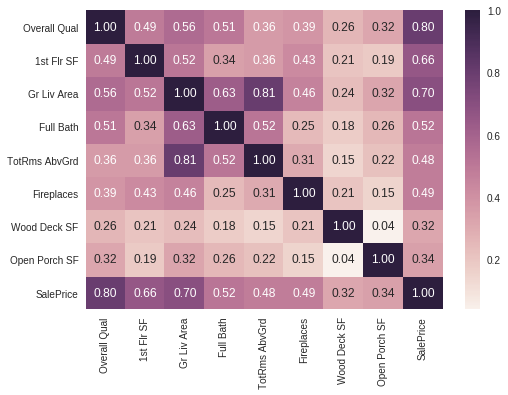

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# put your code here

#Select only the columns in sorted_corrs with a correlation above 0.3 and assign to strong_corrs.
strong_corrs = sorted_corrs[sorted_corrs>0.3]
#print(strong_corrs)
#strong_corrs.index

#Use the seaborn.heatmap() function to generate a correlation matrix heatmap for the columns in strong_corrs.
train_subset_corr2 = train_subset[strong_corrs.index]
#print(train_subset_corr2)

sns.heatmap(train_subset_corr2.corr(), 
            annot=True, fmt=".2f")


In [65]:
train_subset_corr2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
Overall Qual     1460 non-null int64
1st Flr SF       1460 non-null int64
Gr Liv Area      1460 non-null int64
Full Bath        1460 non-null int64
TotRms AbvGrd    1460 non-null int64
Fireplaces       1460 non-null int64
Wood Deck SF     1460 non-null int64
Open Porch SF    1460 non-null int64
SalePrice        1460 non-null int64
dtypes: int64(9)
memory usage: 102.7 KB


## 3.4 Train And Test Model

Based on the correlation matrix heatmap, we can tell that the following pairs of columns are strongly correlated:

- **Gr Liv Area** and **TotRms AbvGrd**
- **Garage Area** and **Garage Cars**

If we read the descriptions of these columns from the [data documentation](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt), we can tell that each pair of column reflects very similar information. Bceause **Gr Liv Area** and **Garage Area** are continuous variables that capture more nuance, let's drop the **TotRms AbvGrd** and **Garage Cars**.

The last thing we'll need to do is confirm that the test set contains no missing values for these columns:

```python
>>> final_corr_cols = strong_corrs.drop(['Garage Cars', 'TotRms AbvGrd'])
>>> test[final_corr_cols.index].info()
class 'pandas.core.frame.DataFrame'
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 9 columns):
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
Fireplaces       1470 non-null int64
Full Bath        1470 non-null int64
1st Flr SF       1470 non-null int64
Garage Area      1469 non-null float64
Gr Liv Area      1470 non-null int64
Overall Qual     1470 non-null int64
SalePrice        1470 non-null int64
dtypes: float64(1), int64(8)
memory usage: 103.4 KB
```

Looks like the test set has one pesky row with a missing value for **Garage Area**. Let's just drop this row for now. Finally, let's train and test a model using these columns to see how they fare.



**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Filter the test data frame so it only contains the columns from **final_corr_cols.index**. Then, drop the row containing missing values and assign the result to **clean_test**
- Build a linear regression model using the features in **features.**
- Calculate the RMSE on the test and train sets.
- Assign the train RMSE to **train_rmse** and the test RMSE to **test_rmse.**


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

final_corr_cols = strong_corrs.drop(['TotRms AbvGrd'])
features = final_corr_cols.drop(['SalePrice']).index
target = 'SalePrice'

# put your code here
#test.info()

#Filter the test data frame so it only contains the columns from final_corr_cols.index. Then, drop the row containing missing values and assign the result to clean_test
clean_test = test[final_corr_cols.index]
#clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 1460 to 2929
Data columns (total 8 columns):
Overall Qual     1470 non-null int64
1st Flr SF       1470 non-null int64
Gr Liv Area      1470 non-null int64
Full Bath        1470 non-null int64
Fireplaces       1470 non-null int64
Wood Deck SF     1470 non-null int64
Open Porch SF    1470 non-null int64
SalePrice        1470 non-null int64
dtypes: int64(8)
memory usage: 91.9 KB


In [75]:
cols_3 = ['Overall Qual', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF' ]
print(cols_3)

['Overall Qual', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Wood Deck SF', 'Open Porch SF']


In [0]:
#Build a linear regression model using the features in features.

import pandas as pd
from sklearn import linear_model

#read data

X = train_subset
y = train_subset[['SalePrice']]


#train model on data
model = linear_model.LinearRegression()
model.fit(X, y)

#Calculate the RMSE on the test and train sets.
#Assign the train RMSE to train_rmse and the test RMSE to test_rmse.

In [76]:
lr = LinearRegression()
lr.fit(train_subset[cols_3], train_subset['SalePrice'])

train_predictions_3 = lr.predict(train_subset[cols_3])
test_predictions_3 = lr.predict(clean_test[cols_3])

train_mse_3 = mean_squared_error(train_predictions_3, train_subset['SalePrice'])
test_mse_3 = mean_squared_error(test_predictions_3, clean_test['SalePrice'])

train_rmse_3 = np.sqrt(train_mse_3)
test_rmse_3 = np.sqrt(test_mse_3)

print(train_rmse_3)
print(test_rmse_3)

print("a0: ",lr.intercept_)
print("a1: ", lr.coef_)


35782.36767818103
41810.4331552837
('a0: ', -117369.75635839443)
('a1: ', array([27640.1568882 ,    51.18831608,    39.32408641,  -513.17309483,
        7169.27564753,    44.97711546,    63.49618416]))


## 3.5 Removing Low Variance Features

The last technique we'll explore is removing features with low variance. When the values in a feature column have low variance, they don't meaningfully contribute to the model's predictive capability. On the extreme end, let's imagine a column with a variance of **0**. This would mean that all of the values in that column **were exactly the same**. This means that the column isn't informative and isn't going to help the model make better predictions.

To make apples to apples comparisons between columns, we need to rescale all of the columns to vary between **0** and **1**. Then, we can set a cutoff value for variance and remove features that have less than that variance amount. This is known as min-max scaling or as [rescaling](https://en.wikipedia.org/wiki/Feature_scaling#Rescaling). Here's the formula for rescaling:

$$\frac{x−min(x)}{max(x)−min(x)}$$

Where:

- $x$ is an individual value
- $min(x)$ is the minimum value for the column $x$ belongs to
- $max(x)$ is the maximum value for the column $x$ belongs to


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Select the columns in **features** from the **train** data frame. Rescale each of the columns so the values range from 0 to 1.
- Calculate and display the column minimum and maximum values to ensure that all values range from 0 to 1.
- Calculate the variance of these columns, sort the resulting series by its values, and assign to **sorted_vars.**
- Display **sorted_vars** using the **print()** function.

In [94]:
# put your code here
train_rescaled = (train[features] - train[features].min(axis=0))/(train[features].max(axis=0) - train[features].min(axis=0))
#train_rescaled.min(axis=0)
#train_rescaled.max(axis=0)
sorted_vars = np.var(train_rescaled)
print(sorted_vars)

Overall Qual     0.024479
1st Flr SF       0.025796
Gr Liv Area      0.023063
Full Bath        0.018608
Fireplaces       0.046558
Wood Deck SF     0.033042
Open Porch SF    0.013928
dtype: float64


## 3.6 Final Model


To wrap up this mission, let's set a cutoff variance of **0.015**, remove the **Open Porch SF feature**, and train and test a model using the remaining features.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Build a linear regression model using the remaining features.
- Calculate the RMSE on the test and train sets.
- Assign the train RMSE to **train_rmse_2** and the test RMSE to **test_rmse_2**.
- Display both RMSE values using the **print()** function.

In [0]:
cols_4 = ['Overall Qual', '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Fireplaces', 'Wood Deck SF']

In [101]:
# put your code here
train_subset

lr = LinearRegression()
lr.fit(train_subset[cols_4], train_subset['SalePrice'])

train_predictions_4 = lr.predict(train_subset[cols_4])
test_predictions_4 = lr.predict(clean_test[cols_4])

train_mse_4 = mean_squared_error(train_predictions_4, train_subset['SalePrice'])
test_mse_4 = mean_squared_error(test_predictions_4, clean_test['SalePrice'])

train_rmse_4 = np.sqrt(train_mse_4)
test_rmse_4 = np.sqrt(test_mse_4)

print(train_rmse_4)
print(test_rmse_4)

print("a0: ",lr.intercept_)
print("a1: ", lr.coef_)

35984.30198972422
41407.808154241815
('a0: ', -120966.98476371003)
('a1: ', array([28262.71381745,    51.06964525,    41.14722093,  -226.55270595,
        7036.96577398,    42.752512  ]))


## 3.7 Next-Steps

We were able to improve the RMSE value to approximately **40591** by removing the **Open Porch SF** feature. This is most likely the furthest we can go without transforming and utilizing the other features in the dataset so we'll stop here for now. In the next 2 sections, we'll explore 2 different ways of fitting models. Afterwards, we'll explore ways to clean and engineer new features from the existing features to improve model accuracy even further.

In [0]:
# put your code here

# 4.0 Gradient Descent



## 4.1 Introduction


In the previous section, we learned how the linear regression model estimates the relationship between the feature columns and the target column and how we can use that for making predictions. In this mission and the next, we'll discuss the 2 most common ways for finding the optimal parameter values for a linear regression model. Each combination of unique parameter values forms a unique linear regression model, and the process of finding these optimal values is known as **model fitting**. Both approaches to model fitting we'll explore aim to minimize the following function:

$$MSE=\frac{1}{n}\sum_{i=1}^n(\hat{y}_i−y_i)^2$$


This function is the mean squared error between the predicted labels made using a given model and the true labels. The problem of choosing a set of values that minimize or maximize another function is known as an [optimization problem](https://en.wikipedia.org/wiki/Mathematical_optimization).

To build intuition for the optimization process, let's start with a single parameter linear regression model:

$$\hat{y}=a_1x_1$$

Note that this is different from a simple linear regression model, which actually has two parameters: $x_0$ and $x_1$.

$$\hat{y}=a_1x_1+a_0$$

Let's use the **Gr Liv Area** column for the single parameter:

$$\hat{SalePrice}=a_1∗GrLivArea$$

<img width="300" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1k0Mj4NgMElCcDh1NAggOiS95ZAzg5SmF">

## 4.2 Single Variable Gradient Descent

In the previous figure, we observed how the optimization function follows a curve with a minimum value. **This should remind you of our exploration of relative minimum values from calculus**. If you recall, we computed the critical points by calculating the curve's derivative, setting it equal to 0, and finding the x value at this point. Unfortunately, this approach won't work when we have multiple parameter values because minimizing one parameter value may increase another parameter's value. In addition, while we can plot the MSE curve when we only have a single parameter we're trying to find and visually select the value that minimizes the MSE, this approach won't work when we have multiple parameter value because we can't visualize past 3 dimensions.

In this mission, we'll explore an iterative technique for solving this problem, known as **gradient descent**. The [gradient descent algorithm](https://en.wikipedia.org/wiki/Gradient_descent) works by iteratively trying different parameter values until the model with the lowest mean squared error is found. Gradient descent is a commonly used optimization technique for other models as well, like neural networks, which we'll explore later in this track.

Here's an overview of the gradient descent algorithm for a single parameter linear regression model:

- select initial values for the parameter: $a_1$
- repeat until convergence (usually implemented with a max number of iterations):
    - calculate the error (MSE) of model that uses current parameter value: $MSE(a_1)=\frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)}−y^{(i)})^2$
    - calculate the derivative of the error (MSE) at the current parameter value: $\frac{d}{da_1}MSE(a_1)$
    - update the parameter value by subtracting the derivative times a constant ($\alpha$, called the learning rate): $a_1:=a_1−\alpha \frac{d}{da_1}MSE(a_1)$
    
    
In the last step of the algorithm, you'll notice we used we used := to indicate that the value on the right is assigned to the variable on the left. While in Python, we've used to the equals operator (=) for assignment, we've used it in math (=) to signify equality. For example, a = 1 in Python assigns the value 1 to the variable a. In math, a=1 asserts that a is equal to 1. In mathematical papers, sometimes $\leftarrow$ is also used to signify assignment:

$a_1\leftarrow a_1 − \alpha \frac{d}{da_1}MSE(a_1)$

Selecting an appropriate initial parameter and learning rate will reduce the number of iterations required to converge, and is part of hyperparameter optimization. We won't dive into those techniques in this course and will instead focus on how the algorithm works. In the next section, we'll unpack how to calculate the derivative of the error function at each iteration of the algorithm.


## 4.3 Derivative Of The Cost Function


In mathematical optimization, a function that we optimize through minimization is known as a **cost function** or sometime as the [loss function](https://en.wikipedia.org/wiki/Loss_function). Because we're trying to fit a single parameter model, we can replace with $y^{(i)}$ with $a_1x_1^{(i)}$ in the cost function:

$$MSE(a_1)=\frac{1}{m}\sum_{i=1}^{m}(a_1x_1^{(i)}−y^{(i)})^2$$

In this screen, we'll apply calculus properties to simplify this derivative to something we can compute. **We encourage you to follow along using pencil and paper, and see if you can apply the properties we mention at each step to obtain the same result we did**. Note that while you'll probably never have to implement gradient descent yourself (as most packages have high performance implementations), understanding the math will help make it easier for you to debug when you run into issues.

$$\frac{d}{da_1}MSE(a_1)=\frac{d}{da_1}\frac{1}{m}\sum_{i=1}^{m}(a_1x_1^{(i)}−y^{(i)})^2$$


By applying the [linearity of differentiation](https://en.wikipedia.org/wiki/Linearity_of_differentiation) property from calculus, we can bring the derivative term inside the summation:

$$\frac{d}{da_1}MSE(a_1)=\frac{1}{m}\sum_{i=1}^{m}\frac{d}{da_1}(a_1x_1^{(i)}−y^{(i)})^2$$

We can apply both the power rule and the chain rule to simplify this. You can read more about the chain rule [here](https://en.wikipedia.org/wiki/Chain_rule) or observe how both are applied together [here](https://www.khanacademy.org/math/calculus-home/taking-derivatives-calc/chain-rule-calc/v/differentiating-powers-of-functions):

$$\frac{d}{da_1}MSE(a_1)=\frac{1}{m}\sum_{i=1}^{m}2(a_1x_1^{(i)}−y^{(i)})\frac{d}{da_1}(a_1x_1^{(i)}−y^{(i)})$$

Because we're differentiating $a_1x_1^{(i)}−y^{(i)}$ with respect to $a_1$, we treat $y^{(i)}$ and $x_1^{(i)}$ as constants. $\frac{d}{da_1}(a_1x_1^{(i)}−y^{(i)})$ then simplifies to just $x_1^{(i)}$:

$$\frac{d}{da_1}MSE(a_1)=\frac{2}{m}\sum_{i=1}^{m}x_1^{(i)}(a_1x_1^{(i)}−y^{(i)})$$

For every iteration of gradient descent:

- this derivative is computed using the current $a_1$ value
- the derivative is multiplied by the learning rate ($\alpha$): $\alpha \frac{d}{da_1}MSE(a_1)$
- the result is subtracted from the current parameter value and assigned as the new parameter value: $a1:=a_1−\alpha \frac{d}{da_1}MSE(a_1)$

Here's what this would look like in code if we ran gradient descent for **10** iterations:

```python
a1_list = [1000]
alpha = 10
for x in range(0, 10):
    a1 = a1_list[x]
    deriv = derivative(a1, xi_list, yi_list)
    a1_new = a1 - alpha*deriv
    a1_list.append(a1_new)
```

To test your understanding, implement the **derivative()** function.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Finish implementing the **derivative()** function:
  - This function should return the derivative at the current value of $a_1$.
- Uncomment the 2 lines of code that run the **gradient_descent()** function, assign the list of iterations for the  $a_1$ parameter to **param_iterations**, and assign the last iteration for $a_1$  to **final_param**.

In [41]:
def derivative(a1, xi_list, yi_list):
    # Modify this function.
    m = len(xi_list)
    d = 2*np.sum(np.dot(xi_list,(a1*xi_list - yi_list)))/m
    #d = (2/m) * np.sum(a1*xi_list - yi_list)
    return d

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial):
    a1_list = [a1_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        deriv = derivative(a1, xi_list, yi_list)
        a1_new = a1 - alpha*deriv
        a1_list.append(a1_new)
    return(a1_list)

# Uncomment when ready.
param_iterations = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150)
final_param = param_iterations[-1]

print(final_param)
print(param_iterations)



# put your code here

120.14219147202726
[150, 106.2425829, 126.61281652184795, 117.12993454465835, 121.54446666356635, 119.4893853206004, 120.44607998550443, 120.0007133410217, 120.2080432815913, 120.1115257161447, 120.15645719306572, 120.13554040337088, 120.14527772164125, 120.14074474270511, 120.14285496417112, 120.14187260032202, 120.14232991664998, 120.14211702381601, 120.14221613105532, 120.1421699940168, 120.14219147202726]


## 4.4 Understanding Multi Parameter Gradient Descent


Now that we've understood how single parameter gradient descent works, let's build some intuition for multi parameter gradient descent. Let's start by visualizing the MSE as a function of the parameter values for the following simple linear regression model:

$$SalePrice=a_1∗GrLivArea+a_0$$

In the below image, we've generated a 3D scatter plot with:

- a_0 on the x-axis
- a_1 on the y-axis
- MSE on the z-axis


<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1437-oWIyZlUkEgW1Kdb2fWlR3jbjfDRV">



## 4.5 Gradient Of The Cost Function


The [gradient](https://en.wikipedia.org/wiki/Gradient) is a multi variable generalization of the derivative. In the last few screens, we were concerned with minimizing the following cost function:

$$MSE(a_1)=\frac{1}{m}\sum_{i=1}^{m}(a_1x_1^{(i)}−y^{(i)})^2$$

When we have 2 parameter values ($a_0$ and $a_1$), the cost function is now a function of 2 variables, not 1:

$$MSE(a_0,a_1)=\frac{1}{m}\sum_{i=1}^{m}(a_0+a_1x_1^{(i)}−y^{(i)})^2$$


Instead of one update rule, we now need two update rules. We need one for $a_0$:

$$a_0:=a_0−\alpha \frac{d}{da_0}MSE(a_0,a_1)$$

and one for $a_1$:

$$a_1:=a_1−\alpha \frac{d}{da_1}MSE(a_0,a_1)$$

Earlier in this mission, we determined that $\frac{d}{da_1}MSE(a_1)$ worked out to $\frac{2}{n}\sum_{i=1}^{n}x_1^{(i)}(a_1x_1^{(i)}−y^{(i)})$. For the multiparameter case, we need to include the additional parameter :

$$\frac{d}{da_1}MSE(a_0,a_1)=\frac{2}{m}\sum_{i=1}^{m}x_1^{(i)}(a_0+a_1x_1^{(i)}−y^{(i)})$$

For $\frac{d}{da_0}MSE(a_0,a_1)$, we won't walk through the proof for this derivative, but it's similar to the one we did for $a_1$ and **we encourage you to derive this yourself on pencil and paper**:

$$\frac{d}{da_0}MSE(a_0,a_1)=\frac{2}{m}\sum_{i=1}^{m}(a_0+a_1x_1^{(i)}−y^{(i)})$$


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Implement the **a0_derivative()** function, which implements the gradient for $a_0$.
  - Even though we're working on the multiparameter case, let's keep this function name consistent with the previous one we implemented (**a1_derivative()**).
  - You'll notice that we added the **a0** parameter to the function parameters. This is because we need both parameters for the individual parameter updates (verify this by looking at the math we explored in this screen).

In [76]:
def a1_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += xi_list[i]*(a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def a0_derivative(a0, a1, xi_list, yi_list):
    len_data = len(xi_list)
    error = 0
    for i in range(0, len_data):
        error += (a0 + a1*xi_list[i] - yi_list[i])
    deriv = 2*error/len_data
    return deriv

def gradient_descent(xi_list, yi_list, max_iterations, alpha, a1_initial, a0_initial):
    a1_list = [a1_initial]
    a0_list = [a0_initial]

    for i in range(0, max_iterations):
        a1 = a1_list[i]
        a0 = a0_list[i]
        
        a1_deriv = a1_derivative(a0, a1, xi_list, yi_list)
        a0_deriv = a0_derivative(a0, a1, xi_list, yi_list)
        
        a1_new = a1 - alpha*a1_deriv
        a0_new = a0 - alpha*a0_deriv
        
        a1_list.append(a1_new)
        a0_list.append(a0_new)
    return(a0_list, a1_list)

# Uncomment when ready.
a0_params, a1_params = gradient_descent(train['Gr Liv Area'], train['SalePrice'], 20, .0000003, 150, 1000)

# put your code here
print(a0_params)
print(a1_params)

final_a1 = a1_params[-1]
final_a0 = a0_params[-1]
print(final_a1)
print(final_a0)

[1000, 999.9729799, 999.985903819668, 999.9802326658179, 999.9832180201482, 999.9821735364511, 999.9830050510147, 999.982963237777, 999.9833279821643, 999.9835034629943, 999.9837670510958, 999.9839896228677, 999.9842312888286, 999.9844640659109, 999.9847009809872, 999.9849359696971, 999.9851718551639, 999.9854073231476, 999.9856429854623, 999.985878557292, 999.9861141712263]
[150, 105.3480174, 126.13471909027578, 116.45794866194147, 120.96274605103366, 118.86564116919577, 119.84189983615775, 119.38742488794898, 119.59899502196909, 119.50050320814833, 119.54635359287238, 119.52500879151889, 119.53494516142034, 119.53031930250451, 119.53247255382082, 119.5314699465034, 119.53193647648796, 119.53171908343842, 119.53182007500544, 119.5317728499472, 119.53179462372518]
119.53179462372518
999.9861141712263


## 4.6 Gradient Descent For Higher Dimensions


What if we want to use many parameters in our model? Gradient descent actually scales to as many variables as you want. Each parameter value will need its own update rule, and it closely matches the update rule for $a_1$:

$$a_0:=a_0−\alpha \frac{d}{da_0}MSE$$
$$a_1:=a_1−\alpha \frac{d}{da_1}MSE$$
$$a_2:=a_2−\alpha \frac{d}{da_2}MSE$$
$$a_3:=a_3−\alpha \frac{d}{da_3}MSE$$
$$a_n:=a_n−\alpha \frac{d}{da_n}MSE$$

Besides the derivative for the MSE with respect to the intercept value ($a_0$), the derivative for other parameters are identical:

$$\frac{d}{da_1}MSE=\frac{2}{m}\sum_{i=1}^{m}x_1^{(i)}(\hat{y}^{(i)}−y^{(i)})$$
$$\frac{d}{da_2}MSE=\frac{2}{m}\sum_{i=1}^{m}x_2^{(i)}(\hat{y}^{(i)}−y^{(i)})$$
$$\frac{d}{da_n}MSE=\frac{2}{m}\sum_{i=1}^{m}x_n^{(i)}(\hat{y}^{(i)}−y^{(i)})$$

## 4.7 Next Steps

In this section, we explored how to find a linear regression model using the gradient descent algorithm. The main challenges with gradient descent include:

- choosing good initial parameter values
- choosing a good learning rate (falls under the domain of hyperparameter optimization)

In the next section, we'll explore a technique called OLS estimation which doesn't require any parameter or hyperparameter value selection.

# 5.0 Ordinary Least Squares


## 5.1 Introduction

In the last section, we explored an iterative technique for model fitting named gradient descent. The gradient descent algorithm requires multiple iterations to converge on the optimal parameter values and the number of iterations is highly dependent on the initial parameter values and the learning rate we select.

In this mission, we'll explore a technique called **ordinary least squares** estimation or OLS estimation for short. Unlike gradient descent, OLS estimation provides a clear formula to directly calculate the optimal parameter values that minimizes the cost function. To understand OLS estimation, we need to first frame our linear regression problem in the matrix form. We've mostly worked with the following form of the linear regression model:

$\hat{y} = a_0 + a_1x_1 + a_2x_2 + \ldots + a_nx_n$

While this form represents the relationship between the features ($x_1$ to $x_2$ ) and the target column ($y$) well when there are just a few parameter values, it doesn't scale well to when we have hundreds of parameters. If you recall from the Linear Algebra course, we can explore how matrix notation lets us better represent and reason about a linear system with many variables. With that in mind, here's what the matrix form of our linear regression model looks like:

$Xa=\hat{y}$


Where $X$ is a matrix representing the columns from the training set our model uses, $a$  is a vector representing the parameter values, and $\hat{y}$  is the vector of predictions. Here's a diagram with some sample values for each:

<img width="400" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1U2R9tC1SOJnHGZd-R4vo78tHFS94vPNp">

Now that we've gained an understanding for the matrix representation of the linear regression model, let's take a peek at the OLS estimation formula that results in the optimal vector $a$:

$a = (X^TX)^{-1}X^Ty$

Let's start by computing OLS estimation to find the best parameters for a model using the following features:

```python
features = ['Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area',
       'Gr Liv Area', 'Overall Qual']
```

In the following screens, we'll dive into the mathematical derivation of the OLS estimation technique. It's important to note that you'll most likely never implement this technique in a data science role and will instead use an existing, efficient implementation (scikit-learn uses OLS under the hood when you call **fit()** on a [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) instance).

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Select just the **features** in features from the training set and assign to **X**.
- Select the **SalePrice** column from the training set and assign to **y**.
- Use the OLS estimation formula to return the optimal parameter values.

In [116]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

features = ['ones','Wood Deck SF', 'Fireplaces', 'Full Bath', '1st Flr SF', 'Garage Area',
       'Gr Liv Area', 'Overall Qual']

train_ones = train
train_ones['ones'] = np.ones(1460, dtype=int)
# put your code here
X = train_ones[features] 
y = train['SalePrice']
#print(X)

X_T = X.transpose()
#print(X_T)

from numpy.linalg import inv
a = np.matmul(np.matmul(inv(np.matmul(X_T,X)),X_T),y)
print(a)


[-1.12764871e+05  3.78815268e+01  7.08698430e+03 -2.22197281e+03
  4.31853639e+01  6.48808564e+01  3.87112549e+01  2.45531837e+04]


## 5.2 Cost Function

Unlike gradient descent, OLS estimation provides what is known as a **closed form solution** to the problem of finding the optimal parameter values. A closed form solution is one where a solution can be computed arithmetically with a predictable amount of mathematical operations. Gradient descent, on the other hand, is an algorithmic approach that can require a different number of iteration (and therefore a different number of mathematical operations) based on the initial parameter values, the learning rate, etc. While the approach is different, both techniques share the high level objective of minimizing the cost function.

Before we can dive into how the cost function is represented in the matrix form, let's understand how the error is represented. Because the error is the difference between the predictions made using the model $\hat{y}$  and the actual labels $y$ , it's represented as a vector. The greek letter for E (epsilon $\epsilon$) is often used to represent the error vector:

$\epsilon = \hat{y} - y$

We can build on this to define $y$:

$y = Xa - \epsilon$


Even though this closely resembles the matrix equation of $Ax=b$, we have 2 unknowns (the vector $a$ and the vector $\hat{y}$ . We're looking for a model, represented using the parameter vector $a$ , that will minimize the mean squared error between the labels, $y$ , and the predictions, $\hat{y}$. Said another way, the cost function is this mean squared error.

Here's what the cost function looks like in matrix form:

$\displaystyle J(a) = \frac{1}{n}(Xa- y)^T(Xa-y)$

## 5.3 Derivative Of The Cost Function

The derivative of the cost function is decently involved, and out of scope for this lesson. Understanding the derivation requires some familiarity with [matrix calculus](https://en.wikipedia.org/wiki/Matrix_calculus), which is a specific notation for applying calculus concepts to matrices. If you're interested in the derivation, we recommend that you read Eli Bendersky's wonderful walkthrough of the derivation on his [blog](http://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/).

Here's the derivative of the cost function:

$\displaystyle \frac{dJ(a)}{da}=2X^TXa - 2X^Ty$

To find the vector $a$  that minimizes the cost function $J(a)$, we need to set the derivative equal 0 to $a$  and solve for :

$2X^TXa - 2X^Ty = 0$

Let's move the second term to the right hand side and divide both sides by 2:

$X^TXa = X^Ty $

Our goal is to isolate $a$, the parameter vector. The last step we need to perform is "divide out" $X^TX$ from the left hand side.

If you recall, we can "divide" matrix terms by computing the inverse. Let's dig up the example we explored in the linear algebra course. We can cancel $A$ from the following equation  $Ax=b$ by multiplying both sides by the inverse $A^{-1}Ax = A^{-1}b$. This leaves us with  $x = A^{-1}b$.

To cancel $X^TX$ from the left side, we need to compute the inverse of it and multiply it by both sides. We're now left with the OLS estimation formula:

$a = (X^TX)^{-1}X^Ty$




## 5.4 Gradient Descent vs. Ordinary Least Squares

Now that we've explored a lot of the math that underlies OLS estimation, let's understand its limitations. The biggest limitation is that OLS estimation is computationally expensive when the data is large. This is because computing a matrix inverse has a computational complexity of apprximately O(n^3). You can read more about computational complexity of the matrix inverse and other common matrix operations on [Wikipedia](https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations#Matrix_algebra).

OLS is commonly used when the number of elements in the dataset (and therefore the matrix that's inverted) is less than a few million elements. On larger datasets, gradient descent is used because it's much more flexible. For many practical problems, we can set a threshold accuracy value (or a set number of iterations) and use a "good enough" solution. This is especially useful when iterating and trying different features in our model.

## 5.5 Next steps

In this section, we explored a closed form solution to fitting a linear regression model called OLS estimation. We explored some of the intuition behind the math for this technique and ended by exploring it's computational complexity. In the next section, we'll explore how to clean some of the remaining features in the training set to use in our model.

# 6.0 Processing and Transforming Features

## 6.1 Introduction

To understand how linear regression works, we've stuck to using features from the training dataset that contained no missing values and were already in a convenient numeric representation. In this mission, we'll explore how to transform some of the the remaining features so we can use them in our model. Broadly, the process of processing and creating new features is known as [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering). Feature engineering is a bit of an art and having knowledge in the specific domain (in this case real estate) can help you create better features. In this mission, we'll focus on some domain-independent strategies that work for all problems.

In the first half of this mission, we'll focus only on columns that contain no missing values but still aren't in the proper format to use in a linear regression model. In the latter half of this mission, we'll explore some ways to deal with missing values.

Amongst the columns that don't contain missing values, some of the common issues include:

- the column is not numerical (e.g. a zoning code represented using text)
- the column is numerical but not ordinal (e.g. zip code values)
- the column is numerical but isn't representative of the type of relationship with the target column (e.g. year values)

Let's start by filtering the training set to just the columns containing no missing values.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Select just the columns from the **train** data frame that contain no missing values.
- Assign the resulting data frame, that contains just these columns, to **df_no_mv**.
- Use the variables display to become familiar with these columns.

In [8]:
import pandas as pd

data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train_null_counts = train.isnull().sum()
#print(train_null_counts)

# put your code here

# Select just the columns from the train data frame that contain no missing values
df_no_mv = train.dropna(axis=1)

train_null_counts_2 = df_no_mv.isnull().sum()
#print(train_null_counts_2)

print(df_no_mv.info())
print(df_no_mv.head())

Order              0
PID                0
MS SubClass        0
MS Zoning          0
Lot Area           0
Street             0
Lot Shape          0
Land Contour       0
Utilities          0
Lot Config         0
Land Slope         0
Neighborhood       0
Condition 1        0
Condition 2        0
Bldg Type          0
House Style        0
Overall Qual       0
Overall Cond       0
Year Built         0
Year Remod/Add     0
Roof Style         0
Roof Matl          0
Exterior 1st       0
Exterior 2nd       0
Exter Qual         0
Exter Cond         0
Foundation         0
Heating            0
Heating QC         0
Central Air        0
Electrical         0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
Kitchen Qual       0
TotRms AbvGrd      0
Functional         0
Fireplaces         0
Garage Cars        0
Garage Area        0
Paved Drive        0
Wood Deck SF       0
Open Porch SF

## 6.2 Categorical features

You'll notice that some of the columns in the data frame **df_no_mv** contain string values. If these columns contain only a limited set of uniuqe values, they're known as **categorical features**. As the name suggests, a categorical feature groups a specific training example into a specific category. Here are some examples from the dataset:

```python
>>> train['Utilities'].value_counts()
AllPub    1457
NoSewr       2
NoSeWa       1
Name: Utilities, dtype: int64
>>> train['Street'].value_counts()
Pave    1455
Grvl       5
>>> train['House Style'].value_counts()
1Story    743
2Story    440
1.5Fin    160
SLvl       60
SFoyer     35
2.5Unf     11
1.5Unf      8
2.5Fin      3
```

To use these features in our model, we need to transform them into numerical representations. Thankfully, pandas makes this easy because the library has a special categorical data type. We can convert any column that contains no missing values (or an error will be thrown) to the categorical data type using the **pandas.Series.astype()** method:

```python
>>> train['Utilities'] = train['Utilities'].astype('category')
```

When a column is converted to the categorical data type, pandas assigns a code to each unique value in the column. Unless we access these values directly, most of the pandas manipulation operations that work for string columns will work for categorical ones as well.

```python
>>> train['Utilities']
0       AllPub
1       AllPub
2       AllPub
3       AllPub
4       AllPub
5       AllPub
...
```


We need to use the **.cat** accessor followed by the **.codes** property to actually access the underlying numerical representation of a column:

```python
>>> train['Utilities'].cat.codes
```

Let's convert all of the text columns that contain no missing values into the categorical data type.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Convert all of the text columns in **train** to the categorical data type.
- Select the **Utilities** column, return the categorical codes, and display the unique value counts for those codes: **train['Utilities'].cat.codes.value_counts()**





In [0]:

import numpy as np

text_cols = df_no_mv.select_dtypes(include=['object']).columns

#for col in text_cols:
#    print(col+":", len(train[col].unique()))

categorical_train = train[text_cols].apply(lambda x: x.astype('category'))

# put your code here
#df_no_mv.info()
#categorical_train_2 = train[text_cols].astype('category')
categorical_train.info()
print(categorical_train['Utilities'].cat.codes.value_counts())
categorical_train['Utilities']



## 6.3 Dummy Coding


When we convert a column to the categorical data type, pandas assigns a number from **0** to **n-1** (where **n** is the number of unique values in a column) for each value. The drawback with this approach is that one of the assumptions of linear regression is violated here. Linear regression operates under the assumption that the features are linearly correlated with the target column. For a categorical feature, however, there's no actual numerical meaning to the categorical codes that pandas assigned for that colum. An increase in the **Utilities** column from **1** to **2** has no correlation value with the target column, and the categorical codes are instead used for uniqueness and exclusivity (the category associated with **0** is different than the one associated with **1**).

The common solution is to use a technique called [dummy coding](https://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29). Instead of having a single column with **n** integer codes, we have **n** binary columns. Here's what that would look like for the **Utilities** column:

| Utilities_AllPub  | Utilities_NoSewr | Utilities_NoSeWa  |
|-----------------------------------|------------------|---|
| 1                                 | 0                | 0 |
| 1                                 | 0                | 0 |
| 1                                 | 0                | 0 |
| 1                                 | 0                | 0 |


Because the original values for the first 4 rows were **AllPub**, in the new scheme, they contain the binary value for true (**1**) in the **Utilities_AllPub** column and **0** for the other 2 columns.

Pandas thankfully has a convenience method to help us apply this transformation for all of the text columns called **pandas.get_dummies()**:

```python
dummy_cols = pd.get_dummies()
```

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Convert all of the columns in **text_cols** from the **train** data frame into dummy columns.
- Delete the original columns from **text_cols** from the **train** data frame.

In [77]:
text_cols2 = list(text_cols.values)
print(text_cols2)

['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond', 'Foundation', 'Heating', 'Heating QC', 'Central Air', 'Electrical', 'Kitchen Qual', 'Functional', 'Paved Drive', 'Sale Type', 'Sale Condition']


In [80]:
import numpy as np


dummy_cols = pd.get_dummies(train[text_cols])
dummy_cols.head()

# put your code here

train_c = train.drop(text_cols2, axis=1)
train_c.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 54 columns):
Order              1460 non-null int64
PID                1460 non-null int64
MS SubClass        1460 non-null int64
Lot Frontage       1211 non-null float64
Lot Area           1460 non-null int64
Alley              109 non-null object
Overall Qual       1460 non-null int64
Overall Cond       1460 non-null int64
Year Built         1460 non-null int64
Year Remod/Add     1460 non-null int64
Mas Vnr Type       1449 non-null object
Mas Vnr Area       1449 non-null float64
Bsmt Qual          1420 non-null object
Bsmt Cond          1420 non-null object
Bsmt Exposure      1419 non-null object
BsmtFin Type 1     1420 non-null object
BsmtFin SF 1       1459 non-null float64
BsmtFin Type 2     1419 non-null object
BsmtFin SF 2       1459 non-null float64
Bsmt Unf SF        1459 non-null float64
Total Bsmt SF      1459 non-null float64
1st Flr SF         1460 non-null int64
2nd Flr SF       

## 6.4 Transforming Improper Numerical Features

In the last few sections, we focused on categorical values that were represented as text columns. Some of the numerical columns in the data set are also categorical and only have a limited set of unique values. We won't explicitly explore those columns in this mission, but the feature transformation process is the same if the numbers used in those categories have no numerical meaning.

Let's now look at numerical features that aren't categorical, but whose numerical representation needs to be improved. We'll focus on the **Year Remod/Add** and **Year Built** columns:

```python
>>> train[['Year Remod/Add', 'Year Built']]
0   1960    1960
1   1961    1961
2   1958    1958
3   1968    1968
4   1998    1997
...
```

The two main issues with these features are:

- Year values aren't representative of how old a house is
- The **Year Remod/Add** column doesn't actually provide useful information for a linear regression model


The challenge with year values like **1960** and **1961** is that they don't do a good job of capturing how old a house is. For example, a house that was built in **1960** but sold in **1980** was sold in half the time one built in **1960** and sold in **2000**. Instead of the years certain events happened, we want the difference between those years. We should create a new column that's the difference between both of these columns.

For this particular piece of information (years until remodeled), this is a sensible approach. Domain knowledge can help you understand how to best transform features to represent information well for a linear model. If you're ever confused about a feature or how it should be represented, reading scientific papers or posts by researchers in the specific domain is critical. Many winners of [Kaggle data science competitions](https://www.import.io/post/how-to-win-a-kaggle-competition/), for example, claim that their focus on data preparation and feature engineering combined with common machine learning models helped them win.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Create a new column **years_until_remod** in the train data frame that represents the difference between **Year Remod/Add** (the later value) and **Year Built** (the earlier value).

In [86]:
# put your code here

train['years_ultil_remond'] = train['Year Remod/Add']-train['Year Built']
print(train['years_ultil_remond'].head())
print(train['Year Remod/Add'].head())
print(train['Year Built'].head())
train

0    0
1    0
2    0
3    0
4    1
Name: years_ultil_remond, dtype: int64
0    1960
1    1961
2    1958
3    1968
4    1998
Name: Year Remod/Add, dtype: int64
0    1960
1    1961
2    1958
3    1968
4    1997
Name: Year Built, dtype: int64


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice,years_ultil_remond
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,5,2010,WD,Normal,215000,0
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000,0
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000,0
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,244000,0
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900,1
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,6,2010,WD,Normal,195500,0
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,4,2010,WD,Normal,213500,0
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,NaN,NaN,NaN,0,1,2010,WD,Normal,191500,0
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,NaN,NaN,NaN,0,3,2010,WD,Normal,236500,1
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,NaN,NaN,NaN,0,6,2010,WD,Normal,189000,0


## 6.5 Missing Values

In the next few screens, we'll focus on handling columns with missing values. When values are missing in a column, there are two main approaches we can take:

- Remove rows containing missing values for specific columns
    - Pro: Rows containing missing values are removed, leaving only clean data for modeling
    - Con: Entire observations from the training set are removed, which can reduce overall prediction accuracy
- Impute (or replace) missing values using a descriptive statistic from the column
    - Pro: Missing values are replaced with potentially similar estimates, preserving the rest of the observation in the model.
    - Con: Depending on the approach, we may be adding noisy data for the model to learn

Given that we only have 1460 training examples (with ~80 potentially useful features), we don't want to remove any of these rows from the dataset. Let's instead focus on **imputation** techniques.

We'll focus on columns that contain at least 1 missing value but less than 365 missing values (or 25% of the number of rows in the training set). There's no strict threshold, and many people instead use a 50% cutoff (if half the values in a column are missing, it's automatically dropped). Having some domain knowledge can help with determining an acceptable cutoff value.

**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Select only the columns from **train** that contain more than 0 missing values but less than 584 missing values. Assign the resulting data frame to **df_missing_values**.
- Display the number of missing values for each column in **df_missing_values**.
- Display the data type for each column in **df_missing_values**.

In [128]:
import pandas as pd

data = pd.read_csv('AmesHousing.txt', delimiter="\t")
train = data[0:1460]
test = data[1460:]

train_null_counts = train.isnull().sum()

# put your code here
df_missing_values = train[train_null_counts[train_null_counts<584].index]
#df_missing_values.info()


df_missing_values_counts = df_missing_values.isnull().sum()
print(df_missing_values_counts)
print(df_missing_values.info())

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      249
Lot Area            0
Street              0
Lot Shape           0
Land Contour        0
Utilities           0
Lot Config          0
Land Slope          0
Neighborhood        0
Condition 1         0
Condition 2         0
Bldg Type           0
House Style         0
Overall Qual        0
Overall Cond        0
Year Built          0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
Exterior 1st        0
Exterior 2nd        0
Mas Vnr Type       11
Mas Vnr Area       11
Exter Qual          0
Exter Cond          0
Foundation          0
                 ... 
Bsmt Full Bath      1
Bsmt Half Bath      1
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
Kitchen Qual        0
TotRms AbvGrd       0
Functional          0
Fireplaces          0
Garage Type        74
Garage Yr Blt      75
Garage Finish      75
Garage Cars         0
Garage Are

## 6.6 Imputing Missing Values


It looks like about half of the columns in **df_missing_values** are string columns (**object** data type), while about half are **float64** columns. For numerical columns with missing values, a common strategy is to compute the mean, median, or mode of each column and replace all missing values in that column with that value.

Because imputation is a common task, pandas contains a [pandas.DataFrame.fillna()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.fillna.html) method that we can use for this. If we pass in a value, all of the missing values (**NaN**) in the data frame are replaced by that value:

```python
# Only select float columns.
missing_floats = df_missing_vals.select_dtypes(include=['float'])
# Returns a data frame with missing values replaced with 0.
fill_with_zero = missing_floats.fillna(0)
```

You can also pass in a column-wise summarization function and fill in missing values that way:


```python
# Returns a data frame with missing values replaced with mean of that column.
fill_with_mean = missing_floats.fillna(missing_floats.mean())
```

Let's impute all of the missing values in float columns with each column's mean.


**Exercise Start**

<img width="100" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Impute the missing values from **float_cols** with the column's mean.
- Check for any missing values in **float_cols**.

In [0]:
float_cols = df_missing_values.select_dtypes(include=['float'])

# put your code here

# 7.0 Predicting House Sale Prices (guided project)


## 7.1 Introduction

In this lesson, we started by building intuition for model based learning, explored how the linear regression model worked, understood how the two different approaches to model fitting worked, and some techniques for **cleaning, transforming, and selecting features**. In this guided project, you can practice what you learned in this course by exploring ways to improve the models we built.

You'll work with housing data for the city of Ames, Iowa, United States from 2006 to 2010. You can read more about why the data was collected [here](http://ww2.amstat.org/publications/jse/v19n3/decock.pdf). You can also read about the different columns in the data [here](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt).

Let's start by setting up a pipeline of functions that will let us quickly iterate on different models.


<img width="200" alt="creating a repo" src="https://drive.google.com/uc?export=view&id=1ZEtgNq4ig4GfQWZQlOulAHLRu1JKfiKh">



In [0]:
import pandas as pd
pd.options.display.max_columns = 999
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import KFold

In [0]:
df = pd.read_csv("AmesHousing.txt", delimiter="\t")

In [195]:
def transform_features(df):
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

57088.25161263909

## 7.2 Feature Engineering

Handle missing values:
  - All columns:
    - Drop any with 5% or more missing values for now.
  - Text columns:
    - Drop any with 1 or more missing values for now.
  - Numerical columns:
     - For columns with missing values, fill in with the most common value in that column
     
1: All columns: Drop any with 5% or more missing values **for now**.



In [0]:
## Series object: column name -> number of missing values
num_missing = df.isnull().sum()

In [0]:
# Filter Series to columns containing >5% missing values
drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()

# Drop those columns from the data frame. Note the use of the .index accessor
df = df.drop(drop_missing_cols.index, axis=1)

2: Text columns: Drop any with 1 or more missing values **for now**.

In [0]:
## Series object: column name -> number of missing values
text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

## Filter Series to columns containing *any* missing values
drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

df = df.drop(drop_missing_cols_2.index, axis=1)

3: Numerical columns: For columns with missing values, fill in with the most common value in that column



In [164]:
## Compute column-wise missing value counts
num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
fixable_numeric_cols

BsmtFin SF 1       1
BsmtFin SF 2       1
Bsmt Unf SF        1
Total Bsmt SF      1
Garage Cars        1
Garage Area        1
Bsmt Full Bath     2
Bsmt Half Bath     2
Mas Vnr Area      23
dtype: int64

In [165]:
## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
replacement_values_dict

{'Bsmt Full Bath': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 1': 0.0,
 'BsmtFin SF 2': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Mas Vnr Area': 0.0,
 'Total Bsmt SF': 0.0}

In [0]:
## Use `pd.DataFrame.fillna()` to replace missing values.
df = df.fillna(replacement_values_dict)

In [267]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,2.0,470.0,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,2001,2001,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,616.0,Unf,0.0,722.0,1338.0,GasA,Ex,Y,SBrkr,1338,0,0,1338,1.0,0.0,2,0,2,1,Gd,6,Typ,0,2.0,582.0,Y,0,0,170,0,0,0,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,2.0,506.0,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Gable,CompShg,CemntBd,CmentBd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1180.0,Unf,0.0,415.0,1595.0,GasA,Ex,Y,SBrkr,1616,0,0,1616,1.0,0.0,2,0,2,1,Gd,5,Typ,1,2.0,608.0,Y,237,152,0,0,0,0,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0.0,Unf,0.0,994.0,994.0,GasA,Gd,Y,SBrkr,1028,776,0,1804,0.0,0.0,2,1,3,1,Gd,7,Typ,1,2.0,442.0,Y,140,60,0,0,0,0,0,6,2010,WD,Normal,189000


In [167]:
## Verify that every column has 0 missing values
df.isnull().sum().value_counts()

0    64
dtype: int64

What new features can we create, that better capture the information in some of the features?


In [168]:
years_sold = df['Yr Sold'] - df['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [169]:
years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [0]:
## Create new columns
df['Years Before Sale'] = years_sold
df['Years Since Remod'] = years_since_remod

## Drop rows with negative values for both of these new features
df = df.drop([1702, 2180, 2181], axis=0)

## No longer need original year columns
df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)

Drop columns that:

- that aren't useful for ML
- leak data about the final sale, read more about columns [here](https://ww2.amstat.org/publications/jse/v19n3/decock/DataDocumentation.txt)

In [0]:
## Drop columns that aren't useful for ML
df = df.drop(["PID", "Order"], axis=1)

## Drop columns that leak info about the final sale
df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)


Let's update **transform_features()**

In [293]:
def transform_features(df):
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)

    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

df = pd.read_csv("AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

55275.36731241307

## 7.3 Feature Selection


In [304]:
numerical_df = transform_df.select_dtypes(include=['int', 'float'])
numerical_df

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice,Years Before Sale,Years Since Remod
0,6,1960,1960,112.0,639.0,1080.0,1656,1656,1,7,2,2.0,528.0,215000,50,50
1,5,1961,1961,0.0,468.0,882.0,896,896,1,5,0,1.0,730.0,105000,49,49
2,6,1958,1958,108.0,923.0,1329.0,1329,1329,1,6,0,1.0,312.0,172000,52,52
3,7,1968,1968,0.0,1065.0,2110.0,2110,2110,2,8,2,2.0,522.0,244000,42,42
4,5,1997,1998,0.0,791.0,928.0,928,1629,2,6,1,2.0,482.0,189900,13,12
5,6,1998,1998,20.0,602.0,926.0,926,1604,2,7,1,2.0,470.0,195500,12,12
6,8,2001,2001,0.0,616.0,1338.0,1338,1338,2,6,0,2.0,582.0,213500,9,9
7,8,1992,1992,0.0,263.0,1280.0,1280,1280,2,5,0,2.0,506.0,191500,18,18
8,8,1995,1996,0.0,1180.0,1595.0,1616,1616,2,5,1,2.0,608.0,236500,15,14
9,7,1999,1999,0.0,0.0,994.0,1028,1804,2,7,1,2.0,442.0,189000,11,11


In [305]:
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
abs_corr_coeffs

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Year Remod/Add       0.533007
Years Since Remod    0.534985
Full Bath            0.546118
Year Built           0.558490
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [306]:
## Let's only keep columns with a correlation coefficient of larger than 0.4 (arbitrary, worth experimenting later!)
abs_corr_coeffs[abs_corr_coeffs > 0.4]

BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Year Remod/Add       0.533007
Years Since Remod    0.534985
Full Bath            0.546118
Year Built           0.558490
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [307]:
## Drop columns with less than 0.4 correlation with SalePrice
transform_df = transform_df.drop(abs_corr_coeffs[abs_corr_coeffs < 0.4].index, axis=1)
transform_df

,MS Zoning,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,Total Bsmt SF,Heating,Heating QC,Central Air,1st Flr SF,Gr Liv Area,Full Bath,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,SalePrice,Years Before Sale,Years Since Remod
0,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1960,1960,Hip,CompShg,BrkFace,Plywood,112.0,TA,TA,CBlock,639.0,1080.0,GasA,Fa,Y,1656,1656,1,TA,7,Typ,2,2.0,528.0,P,215000,50,50
1,RH,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,1961,1961,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,CBlock,468.0,882.0,GasA,TA,Y,896,896,1,TA,5,Typ,0,1.0,730.0,Y,105000,49,49
2,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,108.0,TA,TA,CBlock,923.0,1329.0,GasA,TA,Y,1329,1329,1,Gd,6,Typ,0,1.0,312.0,Y,172000,52,52
3,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,1968,1968,Hip,CompShg,BrkFace,BrkFace,0.0,Gd,TA,CBlock,1065.0,2110.0,GasA,Ex,Y,2110,2110,2,Ex,8,Typ,2,2.0,522.0,Y,244000,42,42
4,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,791.0,928.0,GasA,Gd,Y,928,1629,2,TA,6,Typ,1,2.0,482.0,Y,189900,13,12
5,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,20.0,TA,TA,PConc,602.0,926.0,GasA,Ex,Y,926,1604,2,Gd,7,Typ,1,2.0,470.0,Y,195500,12,12
6,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,2001,2001,Gable,CompShg,CemntBd,CmentBd,0.0,Gd,TA,PConc,616.0,1338.0,GasA,Ex,Y,1338,1338,2,Gd,6,Typ,0,2.0,582.0,Y,213500,9,9
7,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,1992,1992,Gable,CompShg,HdBoard,HdBoard,0.0,Gd,TA,PConc,263.0,1280.0,GasA,Ex,Y,1280,1280,2,Gd,5,Typ,0,2.0,506.0,Y,191500,18,18
8,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,1995,1996,Gable,CompShg,CemntBd,CmentBd,0.0,Gd,TA,PConc,1180.0,1595.0,GasA,Ex,Y,1616,1616,2,Gd,5,Typ,1,2.0,608.0,Y,236500,15,14
9,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,1999,1999,Gable,CompShg,VinylSd,VinylSd,0.0,TA,TA,PConc,0.0,994.0,GasA,Gd,Y,1028,1804,2,Gd,7,Typ,1,2.0,442.0,Y,189000,11,11


 Which categorical columns should we keep?




In [0]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

- Which columns are currently numerical but need to be encoded as categorical instead (because the numbers don't have any semantic meaning)?
- If a categorical column has hundreds of unique values (or categories), should we keep it? When we dummy code this column, hundreds of columns will need to be added back to the data frame.

In [0]:
## Which categorical columns have we still carried with us? We'll test tehse 
transform_cat_cols = []
for col in nominal_features:
    if col in transform_df.columns:
        transform_cat_cols.append(col)

## How many unique values in each categorical column?
uniqueness_counts = transform_df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
## Aribtrary cutoff of 10 unique values (worth experimenting)
drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
transform_df = transform_df.drop(drop_nonuniq_cols, axis=1)

In [0]:
## Select just the remaining text columns and convert to categorical
text_cols = transform_df.select_dtypes(include=['object'])
for col in text_cols:
    transform_df[col] = transform_df[col].astype('category')
    
## Create dummy columns and add back to the dataframe!
transform_df = pd.concat([
    transform_df, 
    pd.get_dummies(transform_df.select_dtypes(include=['category']))
], axis=1)

Update **select_features()**

In [328]:
def transform_features(df):
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)

    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type", "Year Built", "Year Remod/Add"], axis=1)
    return df

def select_features(df, coeff_threshold=0.4, uniq_threshold=10):
    numerical_df = df.select_dtypes(include=['int', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(abs_corr_coeffs[abs_corr_coeffs < coeff_threshold].index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)

    uniqueness_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    drop_nonuniq_cols = uniqueness_counts[uniqueness_counts > 10].index
    df = df.drop(drop_nonuniq_cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
    
    return df

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)

        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1, )
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

df = pd.read_csv("AmesHousing.txt", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

[29293.36660668915, 25942.752876584054, 35398.324275220635, 26262.054254314975]


29224.124503202205

## 8.0 Pipeline

In [0]:
import numpy as np

# these classes will be useful later for automatic hyperparameter tuning 
from sklearn.base import BaseEstimator, TransformerMixin

class PrepareData(BaseEstimator, TransformerMixin): #prepare data
  def __init__(self):
    self

  def transform_features(df):
    return df

  def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

  def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse
  
  def fit(self, x , y=None):
    return self
  
  def transform(self, x):
    transform_df = transform_features(x)
    filtered_df = select_features(transform_df)
    rmse = train_and_test(filtered_df)
    return filtered_df





In [0]:
a = PrepareData()
b = a.transform(df)
b

In [0]:
def num_data(df):  
    ## Series object: column name -> number of missing values
    num_missing = df.isnull().sum()

    # Filter Series to columns containing >5% missing values
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()

    # Drop those columns from the data frame. Note the use of the .index accessor
    df = df.drop(drop_missing_cols.index, axis=1)

    ## Series object: column name -> number of missing values
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

    ## Filter Series to columns containing *any* missing values
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

    df = df.drop(drop_missing_cols_2.index, axis=1)

    ## Compute column-wise missing value counts
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    
    ## Compute the most common value for each column in `fixable_nmeric_missing_cols`.
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]

    ## Use `pd.DataFrame.fillna()` to replace missing values.
    df2 = df.fillna(replacement_values_dict)
    return df2

In [0]:
#Feature Engineering

import numpy as np

# these classes will be useful later for automatic hyperparameter tuning 
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineering(BaseEstimator, TransformerMixin): #prepare data
  def __init__(self):
    self
  
  def fit(self, x , y=None):
    return self
  
  def transform(self, x):
    df = num_data(x)
    return df

In [0]:
  def new_f(df):  
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    
    ## Create new columns
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    
    ## Drop rows with negative values for both of these new features
    df = df.drop([1702, 2180, 2181], axis=0)

    ## No longer need original year columns
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
    
    ## Drop columns that aren't useful for ML
    df = df.drop(["PID", "Order"], axis=1)

    ## Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
    return df

In [0]:
#New Features

import numpy as np

# these classes will be useful later for automatic hyperparameter tuning 
from sklearn.base import BaseEstimator, TransformerMixin

class NewFeatures(BaseEstimator, TransformerMixin): 
  def __init__(self):
    self

  def fit(self, x , y=None):
    return self
  
  def transform(self, x):
    df = new_f(x)
    return df


In [0]:
def transform_features(df):
    num_missing = df.isnull().sum()
    drop_missing_cols = num_missing[(num_missing > len(df)/20)].sort_values()
    df = df.drop(drop_missing_cols.index, axis=1)
    
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int', 'float']).isnull().sum()
    fixable_numeric_cols = num_missing[(num_missing < len(df)/20) & (num_missing > 0)].sort_values()
    replacement_values_dict = df[fixable_numeric_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(replacement_values_dict)
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):  
    train = df[:1460]
    test = df[1460:]
    
    ## You can use `pd.DataFrame.select_dtypes()` to specify column types
    ## and return only those columns as a data frame.
    numeric_train = train.select_dtypes(include=['integer', 'float'])
    numeric_test = test.select_dtypes(include=['integer', 'float'])
    
    ## You can use `pd.Series.drop()` to drop a value.
    features = numeric_train.columns.drop("SalePrice")
    lr = linear_model.LinearRegression()
    lr.fit(train[features], train["SalePrice"])
    predictions = lr.predict(test[features])
    mse = mean_squared_error(test["SalePrice"], predictions)
    rmse = np.sqrt(mse)
    
    return rmse

In [0]:
#Transform_features

import numpy as np

# these classes will be useful later for automatic hyperparameter tuning 
from sklearn.base import BaseEstimator, TransformerMixin

class TransformFeatures(BaseEstimator, TransformerMixin): 
  def __init__(self):
    self

  def fit(self, x , y=None):
    return self
  
  def transform(self, x):
    transform_df = transform_features(x)
    filtered_df = select_features(transform_df)
    rmse = train_and_test(filtered_df, k=4)
    return (rmse)
    #return filtered_df
    #return rmse
  

In [0]:
transform_features(df)


In [332]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

num_pipeline = Pipeline([#('FeatureEngineering', FeatureEngineering()),
                         #('NewFeatures', NewFeatures()),
                         ('TransformFeatures', TransformFeatures()),
                          ])

filtered_df_pipeline = num_pipeline.fit_transform(df)


[26190.142158899645, 29740.14866703935, 25004.325039524265, 35403.98138847905]


In [312]:
filtered_df_pipeline

(      MS SubClass MS Zoning  Lot Area Street Lot Shape Land Contour Utilities  \
 0              20        RL     31770   Pave       IR1          Lvl    AllPub   
 1              20        RH     11622   Pave       Reg          Lvl    AllPub   
 2              20        RL     14267   Pave       IR1          Lvl    AllPub   
 3              20        RL     11160   Pave       Reg          Lvl    AllPub   
 4              60        RL     13830   Pave       IR1          Lvl    AllPub   
 5              60        RL      9978   Pave       IR1          Lvl    AllPub   
 6             120        RL      4920   Pave       Reg          Lvl    AllPub   
 7             120        RL      5005   Pave       IR1          HLS    AllPub   
 8             120        RL      5389   Pave       IR1          Lvl    AllPub   
 9              60        RL      7500   Pave       Reg          Lvl    AllPub   
 10             60        RL     10000   Pave       IR1          Lvl    AllPub   
 11             